In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


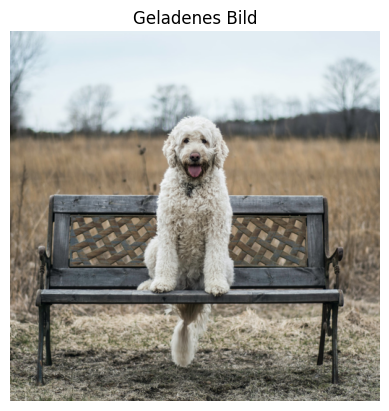

In [ ]:
# Dateipfad angeben
file_path = '/content/drive/My Drive/Master - Seminar/images/image.png'

# Bild laden
image = cv2.imread(file_path)

# Bild anzeigen
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Geladenes Bild")
plt.axis('off')
plt.show()

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
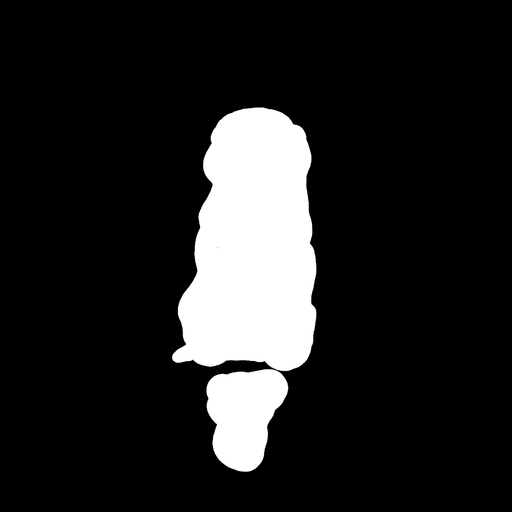

In [ ]:
mask = cv2.imread('/content/drive/My Drive/Master - Seminar/images/mask.png')

mask

In [ ]:
print(mask.shape)  # Sollte nur (Höhe, Breite) sein, nicht (Höhe, Breite, 3)
print(mask.dtype)  # Sollte `uint8` sein
print(np.unique(mask))  # Sollte nur Werte wie 0 und 255 enthalten


(512, 512, 3)
uint8
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 24

In [ ]:
if len(mask.shape) == 3:
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)


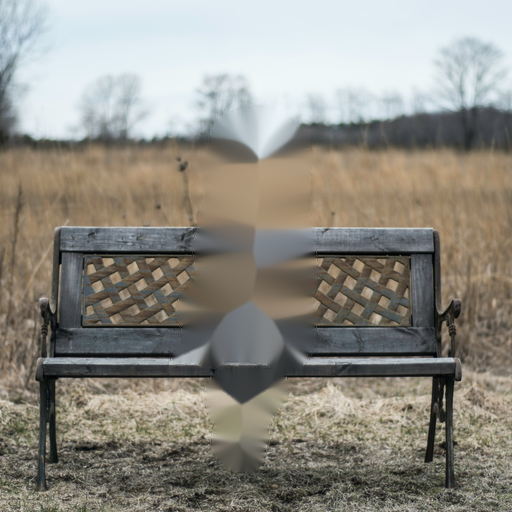

In [ ]:
from google.colab.patches import cv2_imshow

# Inpainting durchführen (falls nötig)
inpaint_result = cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# Ergebnis anzeigen
cv2_imshow(inpaint_result)

In [ ]:
import os
print(os.path.exists('/content/drive/My Drive/Master - Seminar/images/instance_016_ADE_frame_00000079.png'))


True


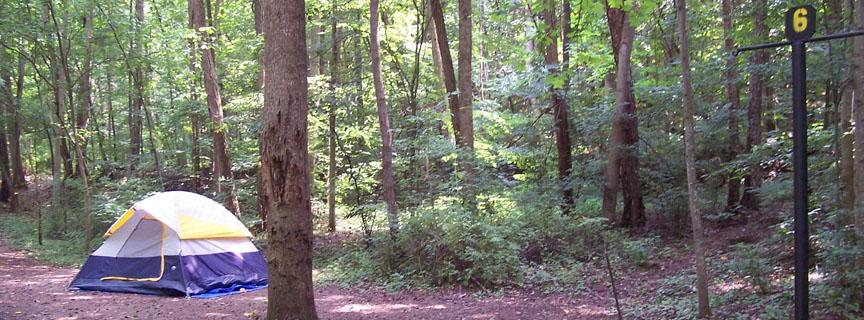

In [ ]:
from google.colab.patches import cv2_imshow

image_ade1 = cv2.imread('/content/drive/My Drive/Master - Seminar/images/ADE_frame_00000079.jpg')


cv2_imshow(image_ade1)

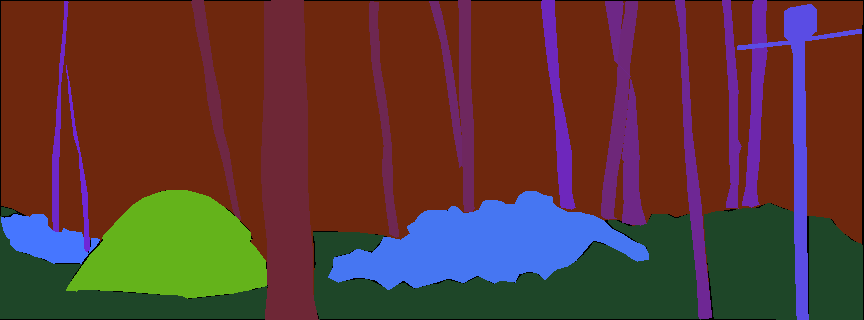

In [ ]:
image_seg = cv2.imread('/content/drive/My Drive/Master - Seminar/images/ADE_frame_00000079_seg.png')

cv2_imshow(image_seg)

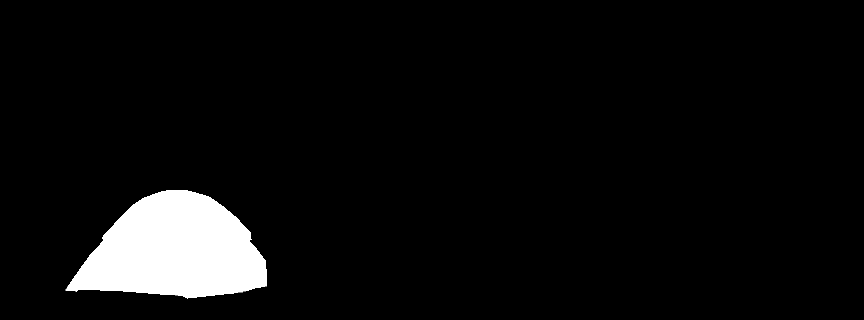

In [ ]:
image_mask_tent = cv2.imread('/content/drive/My Drive/Master - Seminar/images/instance_016_ADE_frame_00000079.png')


cv2_imshow(image_mask_tent)

In [ ]:
print(f"Maske Shape: {image_mask_tent.shape}")
print(f"Maske Datentyp: {image_mask_tent.dtype}")


Maske Shape: (320, 864, 3)
Maske Datentyp: uint8


In [ ]:
if image_mask_tent.ndim == 3:  # Falls die Maske mehr als 1 Kanal hat
    image_mask_tent = cv2.cvtColor(image_mask_tent, cv2.COLOR_BGR2GRAY)

# Konvertiere Maske zu uint8
image_mask_tent = (image_mask_tent * 255).astype('uint8') if image_mask_tent.max() <= 1 else image_mask_tent.astype('uint8')


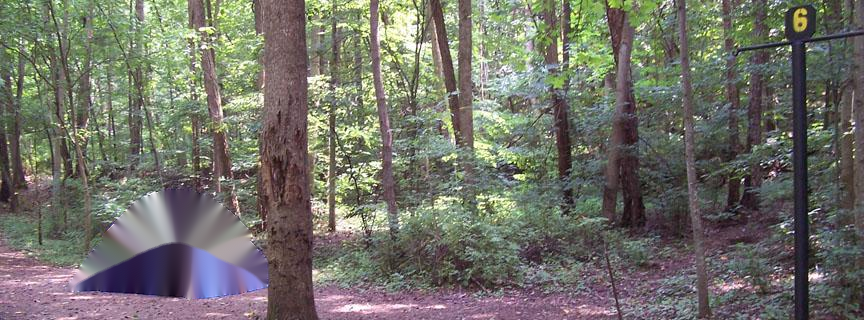

In [ ]:
from google.colab.patches import cv2_imshow

# Inpainting durchführen (falls nötig)
inpaint_result = cv2.inpaint(image_ade1, image_mask_tent, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# Ergebnis anzeigen
cv2_imshow(inpaint_result)

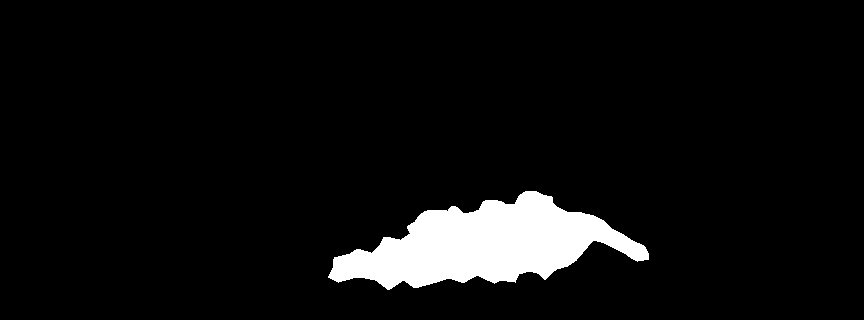

In [ ]:
image_mask_bush = cv2.imread('/content/drive/My Drive/Master - Seminar/images/instance_015_ADE_frame_00000079.png')

cv2_imshow(image_mask_bush)

In [ ]:
if image_mask_bush.ndim == 3:  # Falls die Maske mehr als 1 Kanal hat
    image_mask_bush = cv2.cvtColor(image_mask_bush, cv2.COLOR_BGR2GRAY)

# Konvertiere Maske zu uint8
image_mask_bush = (image_mask_bush * 255).astype('uint8') if image_mask_bush.max() <= 1 else image_mask_bush.astype('uint8')

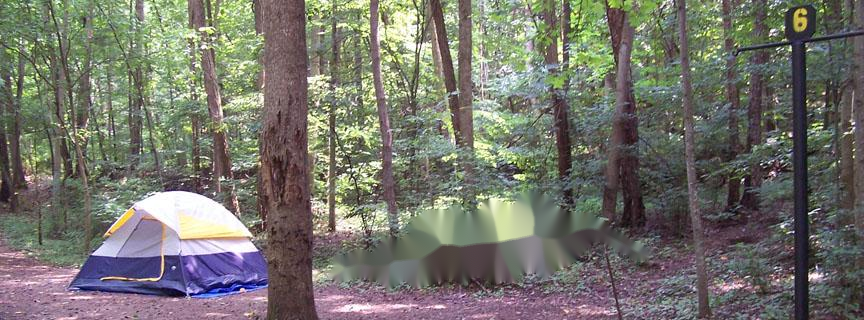

In [ ]:
from google.colab.patches import cv2_imshow

# Inpainting durchführen (falls nötig)
inpaint_result = cv2.inpaint(image_ade1, image_mask_bush, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# Ergebnis anzeigen
cv2_imshow(inpaint_result)

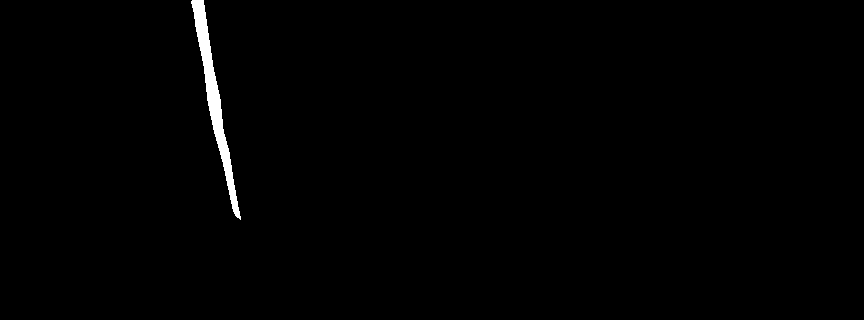

In [ ]:
image_mask_stick = cv2.imread('/content/drive/My Drive/Master - Seminar/images/instance_002_ADE_frame_00000079.png')

if image_mask_stick.ndim == 3:  # Falls die Maske mehr als 1 Kanal hat
    image_mask_stick = cv2.cvtColor(image_mask_stick, cv2.COLOR_BGR2GRAY)

# Konvertiere Maske zu uint8
image_mask_stick = (image_mask_stick * 255).astype('uint8') if image_mask_stick.max() <= 1 else image_mask_stick.astype('uint8')

cv2_imshow(image_mask_stick)


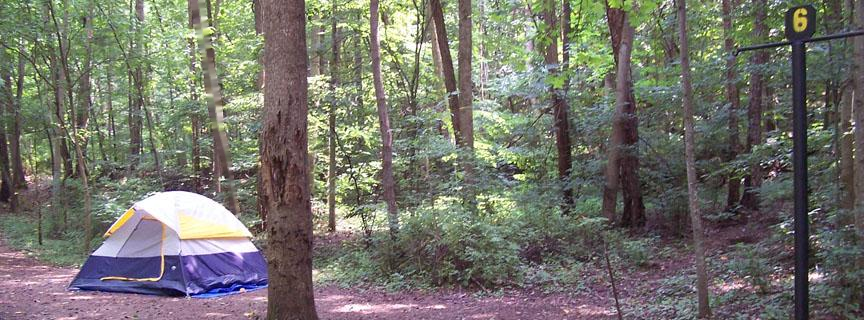

In [ ]:
from google.colab.patches import cv2_imshow

# Inpainting durchführen (falls nötig)
inpaint_result = cv2.inpaint(image_ade1, image_mask_stick, inpaintRadius=2, flags=cv2.INPAINT_TELEA)

# Ergebnis anzeigen
cv2_imshow(inpaint_result)

1. StableDiffusionInpaintPipeline


In [ ]:
from diffusers import StableDiffusionInpaintPipeline
import torch

# Pipeline laden
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16  # Reduziert den Speicherverbrauch
)

# Pipeline auf die GPU verschieben
pipe = pipe.to("cuda")


In [ ]:
print(pipe)


In [ ]:
import torch

if torch.cuda.is_available():
    print(f"GPU ist verfügbar: {torch.cuda.get_device_name(0)}")
else:
    print("Keine GPU verfügbar. Stelle sicher, dass die GPU in den Laufzeiteinstellungen aktiviert ist.")


In [ ]:
from PIL import Image

# Bild als PIL-Objekt laden (z. B. aus einer Datei)
# Falls dein Bild bereits in `image_ade1` liegt, direkt konvertieren
image = Image.fromarray(image_ade1).convert("RGB")

# Maske als PIL-Objekt laden (z. B. aus einem NumPy-Array)
mask = Image.fromarray(image_mask_tent).convert("L")  # L für Graustufen


In [ ]:
print(image.mode)  # Sollte 'RGB' sein
print(mask.mode)   # Sollte 'L' sein


In [ ]:
# Prompt, der beschreibt, was in die Maske eingefügt werden soll
prompt = "A beautiful landscape with mountains and trees"

# Inpainting durchführen
result = pipe(prompt=prompt, image=image, mask_image=mask).images[0]

# Ergebnis speichern
result.save('/content/drive/My Drive/Master - Seminar/images/inpainted_image.jpg')

# Ergebnis anzeigen
result.show()


In [ ]:
from IPython.display import display
display(result)


In [ ]:
import os
print(os.path.exists('/content/drive/My Drive/Master - Seminar/images/inpainted_image.jpg'))


In [ ]:
import torch
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image
from PIL import Image

pipeline = AutoPipelineForInpainting.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", torch_dtype=torch.float16).to('cuda')


blurred_mask = pipeline.mask_processor.blur(mask, blur_factor=33)
blurred_mask